In [1]:
#importing the libraries before using them
import pandas as pd
import numpy as np
import datetime
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, cross_validation, svm

C:\Users\dell\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Data cleaning and preprocessing

In [2]:
#uploading the csv dataset and converting into the dataframe
dataset = pd.read_csv('NSE-RELIANCE.csv',index_col="Date",parse_dates=True)
#figuring out missing values in the dataset
dataset.isna().sum()


Open                    0
High                    0
Low                     0
Last                    1
Close                   1
Total Trade Quantity    1
Turnover (Lacs)         1
dtype: int64

In [3]:
# propagate last valid observation forward to the next valid observation if theres a NAN value
dataset.fillna(method='ffill',inplace=True)
#rechecking for missing values
dataset.isna().sum()


Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [4]:
dataset.tail()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
1998-03-26,183.85,184.25,178.75,179.25,179.45,6915150.0,12542.00
1998-03-25,181.50,184.60,179.00,183.50,183.85,8936250.0,16292.18
1998-03-24,184.00,184.90,177.50,178.00,178.70,8838650.0,15951.78
1998-03-23,178.50,181.00,178.50,180.20,180.20,1758700.0,3165.37
1998-03-20,175.35,178.25,173.75,180.20,180.20,1758700.0,3165.37


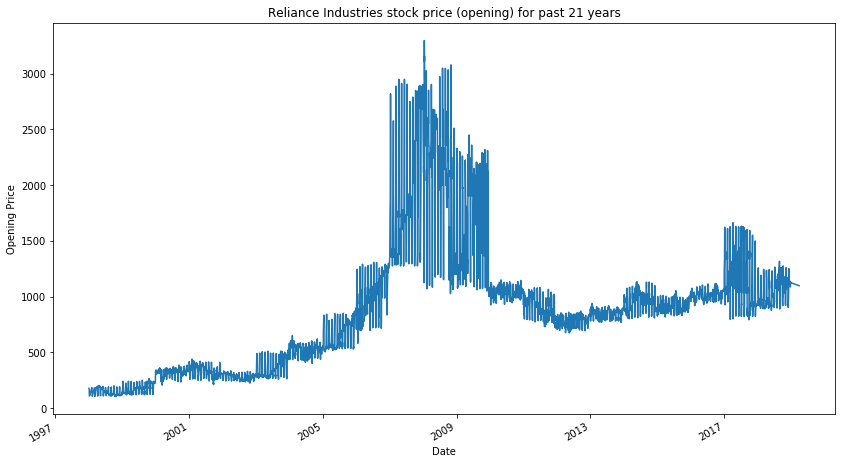

In [5]:
open_price=dataset['Open']
open_price = open_price.plot(figsize=(14, 8), title="Reliance Industries stock price (opening) for past 21 years")
open_price.set_ylabel("Opening Price")

plt.show()


# Creating the Model

In [6]:
#plitting the  data into train and test set: 90% / 10%
from sklearn import linear_model
dates = pd.DataFrame(np.arange(len(dataset)))
open = dataset['Open']
x_train, x_test, y_train, y_test = train_test_split(dates, open, test_size = 0.1, random_state = 1)

In [7]:
model = linear_model.LinearRegression()
# Fit linear model using the train data set
model.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  -0.18624675055482554
Intercept:  1353.6245867318078


# Model evaluation

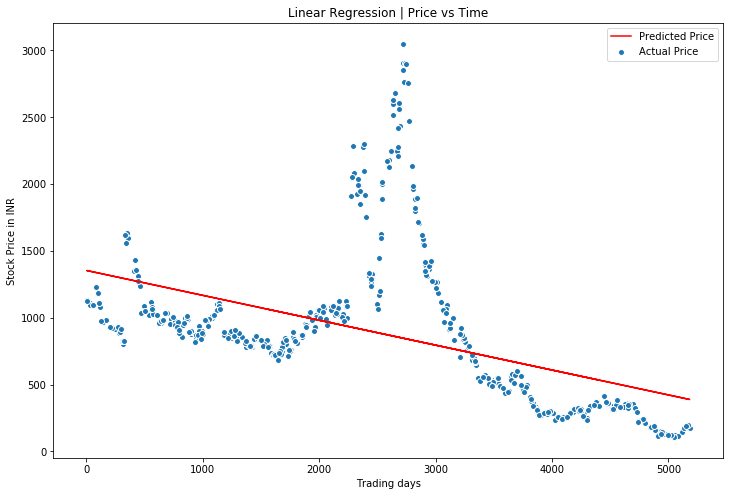

In [9]:
#Evaluating the model on the test set 
plt.figure(1, figsize=(12,8))
plt.title('Linear Regression | Price vs Time')
plt.plot(x_test, model.predict(x_test), color='r', label='Predicted Price')
plt.scatter(x_test, y_test, edgecolor='w', label='Actual Price')


plt.xlabel('Trading days')
plt.ylabel('Stock Price in INR')
plt.legend(loc='upper right')

plt.show()

In [10]:
# Generating array with predicted values
y_pred = model.predict(x_test)

In [12]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics

In [13]:
# Statistical summary of test data
dataset['Open'].describe()

count    5184.000000
mean      872.839477
std       570.634145
min       102.600000
25%       375.750000
50%       858.475000
75%      1052.400000
max      3298.000000
Name: Open, dtype: float64

In [14]:
from math import sqrt
TM_MSE = np.mean((y_pred - y_test) ** 2)
TM_RMSE = sqrt(TM_MSE)

print ('Coefficients:', model.coef_)
print ('Variance score', model.score(x_test, y_test))
print ('Mean Squared Error (MSE)', TM_MSE)
print ('Root Mean Squared Error (RMSE)', TM_RMSE)

Coefficients: [-0.18624675]
Variance score 0.2008226054894391
Mean Squared Error (MSE) 262347.3732933158
Root Mean Squared Error (RMSE) 512.1985682265383


In [15]:
#Accuracy calculation :
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.2008226054894391


In [16]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.20188919441921416

# Analysis with a smaller dataset (only 2018)
#Cross checking

In [17]:
test_2018  =dataset['2018-01-01':'2018-12-31']

In [18]:
print(test_2018.head())

               Open     High      Low     Last    Close  Total Trade Quantity  \
Date                                                                            
2018-12-31  1130.95  1133.85  1116.20  1125.25  1121.25             7222817.0   
2018-12-28  1125.50  1135.25  1121.20  1125.65  1125.55             7666016.0   
2018-12-27  1107.20  1127.00  1104.00  1118.10  1120.20            12478000.0   
2018-12-26  1085.80  1100.00  1065.65  1099.70  1098.35             7210059.0   
2018-12-24  1100.90  1103.20  1086.55  1089.30  1089.15             4144535.0   

            Turnover (Lacs)  
Date                         
2018-12-31         81060.63  
2018-12-28         86610.13  
2018-12-27        139715.54  
2018-12-26         77976.94  
2018-12-24         45342.57  


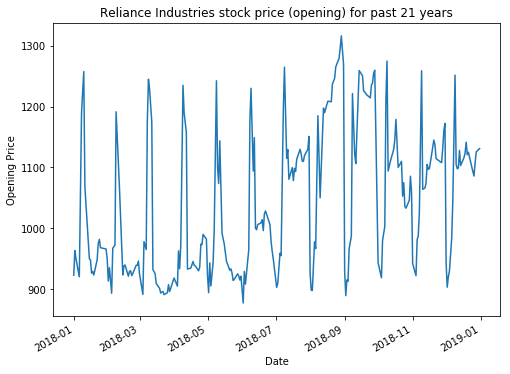

In [19]:
open_2018=test_2018['Open']
open_2018 = open_2018.plot(figsize=(8, 6), title="Reliance Industries stock price (opening) for past 21 years")
open_2018.set_ylabel("Opening Price")

plt.show()

In [20]:
from sklearn import linear_model
dates = pd.DataFrame(np.arange(len(test_2018)))
values = test_2018['Open']
x_ttrain, x_ttest, y_ttrain, y_ttest = train_test_split(dates,values, test_size = 0.20, random_state = 1)
model = linear_model.LinearRegression()
# Fit linear model using the train data set
model.fit(x_ttrain, y_ttrain)
#model.fit(x_train[:int(len(dataset)*0.9)], y_train[:int(len(dataset)*0.9)])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

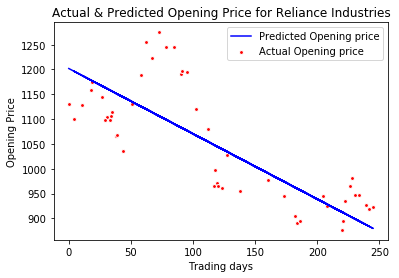

In [21]:
fig = plt.figure()
plt.figure(1,figsize=(16,10))
ax = fig.add_subplot(111)

plt.scatter(x_ttest, y_ttest, color='r',edgecolor='w', s=15, label='Actual Opening price')
plt.plot(x_ttest, model.predict(x_ttest), color='b', linewidth=1.5, label='Predicted Opening price')

plt.xlabel('Trading days')
plt.ylabel('Opening Price')

# title
ax.set_title('Actual & Predicted Opening Price for Reliance Industries')
ax.legend(loc='upper right')

plt.show()

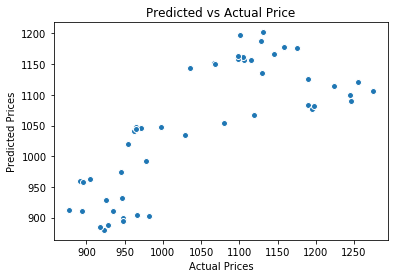

In [22]:
# Generating array with predicted values
y_predd= model.predict(x_ttest)
# Plot predicted vs actual prices ()
plt.scatter(y_ttest, y_predd, edgecolor='w')

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.title('Predicted vs Actual Price')


plt.show()

In [24]:
from math import sqrt
MSE = np.mean((y_predd - y_ttest) ** 2)
RMSE = sqrt(TM_MSE)

print ('Coefficients:', model.coef_)
print ('Variance score', model.score(x_ttest, y_ttest))
print ('Mean Squared Error (MSE)', MSE)
print ('Root Mean Squared Error (RMSE)',RMSE)

Coefficients: [-1.31432725]
Variance score 0.5819478662314631
Mean Squared Error (MSE) 5539.543577080105
Root Mean Squared Error (RMSE) 512.1985682265383


In [25]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_ttest, y_predd)

0.5820008800246231